
# Regression Learning

- Data preprocessing
- Regression Algorithms

The dataset is about Air Pollution in Skopje - Center - Macedonia

The goal is to predict the PM10 concentration using the weather-meteorological data

The features are explained in Data_Info (some of them are removed)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.dummy import DummyRegressor
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

## 1. Load the Data

In [2]:
# load the csv
data = pd.read_csv('Centar_cleaned.csv')  

# visualize the data in a data frame
data

,PM10,apparentTemperature,cloudCover,dewPoint,humidity,precipIntensity,precipProbability,pressure,temperature,uvIndex,...,snow,Clear,Drizzle,Foggy,Mostly Cloudy,Overcast,Partly Cloudy,hour,day,month
0,30.020000,9.03,0.44,5.03,0.58,0.0,0.0,1033.580000,17.41,0.0,...,0,0,0,0,0,0,1,0,1,1
1,30.210000,4.87,0.44,3.24,0.57,0.0,0.0,1033.860000,15.63,0.0,...,0,0,0,0,0,0,1,1,1,1
2,29.400000,3.62,0.44,3.24,0.62,0.0,0.0,1034.140000,13.80,0.0,...,0,0,0,0,0,0,1,2,1,1
3,28.830000,5.83,0.44,3.24,0.57,0.0,0.0,1034.420000,15.63,0.0,...,0,0,0,0,0,0,1,3,1,1
4,27.690000,5.62,0.44,2.61,0.60,0.0,0.0,1034.990000,14.03,0.0,...,0,0,0,0,0,0,1,4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,51.040000,19.62,0.00,10.90,0.56,0.0,0.0,1033.170000,24.19,0.0,...,0,1,0,0,0,0,0,19,31,12
7348,59.000000,12.41,0.00,10.41,0.68,0.0,0.0,1033.360000,19.20,0.0,...,0,1,0,0,0,0,0,20,31,12
7349,72.295000,13.36,0.00,8.82,0.58,0.0,0.0,1033.550000,21.45,0.0,...,0,1,0,0,0,0,0,21,31,12
7350,85.590000,15.63,0.00,10.41,0.79,0.0,0.0,1033.416667,15.63,0.0,...,0,1,0,0,0,0,0,22,31,12


In [3]:
# data statistics
data.describe()

,PM10,apparentTemperature,cloudCover,dewPoint,humidity,precipIntensity,precipProbability,pressure,temperature,uvIndex,...,snow,Clear,Drizzle,Foggy,Mostly Cloudy,Overcast,Partly Cloudy,hour,day,month
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.0,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,72.802447,54.685523,0.419846,42.221562,0.659706,0.000153,0.004354,1018.882155,55.398536,1.009347,...,0.000408,0.322905,0.0,0.046382,0.185528,0.168934,0.275027,11.794070,15.931039,6.318689
std,82.213323,19.914153,0.387737,12.873506,0.207476,0.001423,0.031988,8.375414,19.102358,1.798912,...,0.020198,0.467619,0.0,0.210325,0.388752,0.374719,0.446558,6.754697,8.791142,3.528810
min,0.270000,0.430000,0.000000,-2.210000,0.130000,0.000000,0.000000,986.110000,4.830000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,27.627500,38.522500,0.000000,32.620000,0.510000,0.000000,0.000000,1013.410000,39.400000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,6.000000,8.000000,3.000000
50%,42.680000,53.390000,0.390000,42.800000,0.690000,0.000000,0.000000,1018.028333,53.390000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,12.000000,16.000000,6.000000
75%,77.680000,69.650000,0.750000,53.590000,0.830000,0.000000,0.000000,1023.510000,69.610000,1.009347,...,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,1.000000,18.000000,23.000000,9.000000
max,815.170000,104.870000,1.000000,69.810000,1.000000,0.033200,0.240000,1041.920000,103.810000,9.000000,...,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,23.000000,31.000000,12.000000


In [4]:
# Create X and y... X contains all the features, y contains the target variable (PM10)
y = pd.DataFrame(data.iloc[:,0])
X = data.drop(['PM10'], axis=1)

In [5]:
y

,PM10
0,30.020000
1,30.210000
2,29.400000
3,28.830000
4,27.690000
...,...
7347,51.040000
7348,59.000000
7349,72.295000
7350,85.590000


# 2. Data Preprocessing

Standardize the data. 
Do not standardize the target variable!

In [6]:
from sklearn.preprocessing import StandardScaler
# Extracting names of columns 
columns_names = X.columns.tolist() 
# Scaling data
scaler = StandardScaler().fit(X)
X = pd.DataFrame(scaler.transform(X))
# Add name of columns
X.columns=X.columns = [columns_names]

## Correlation Matrix

Plot the Correlation Matrix between all the features and the target variable

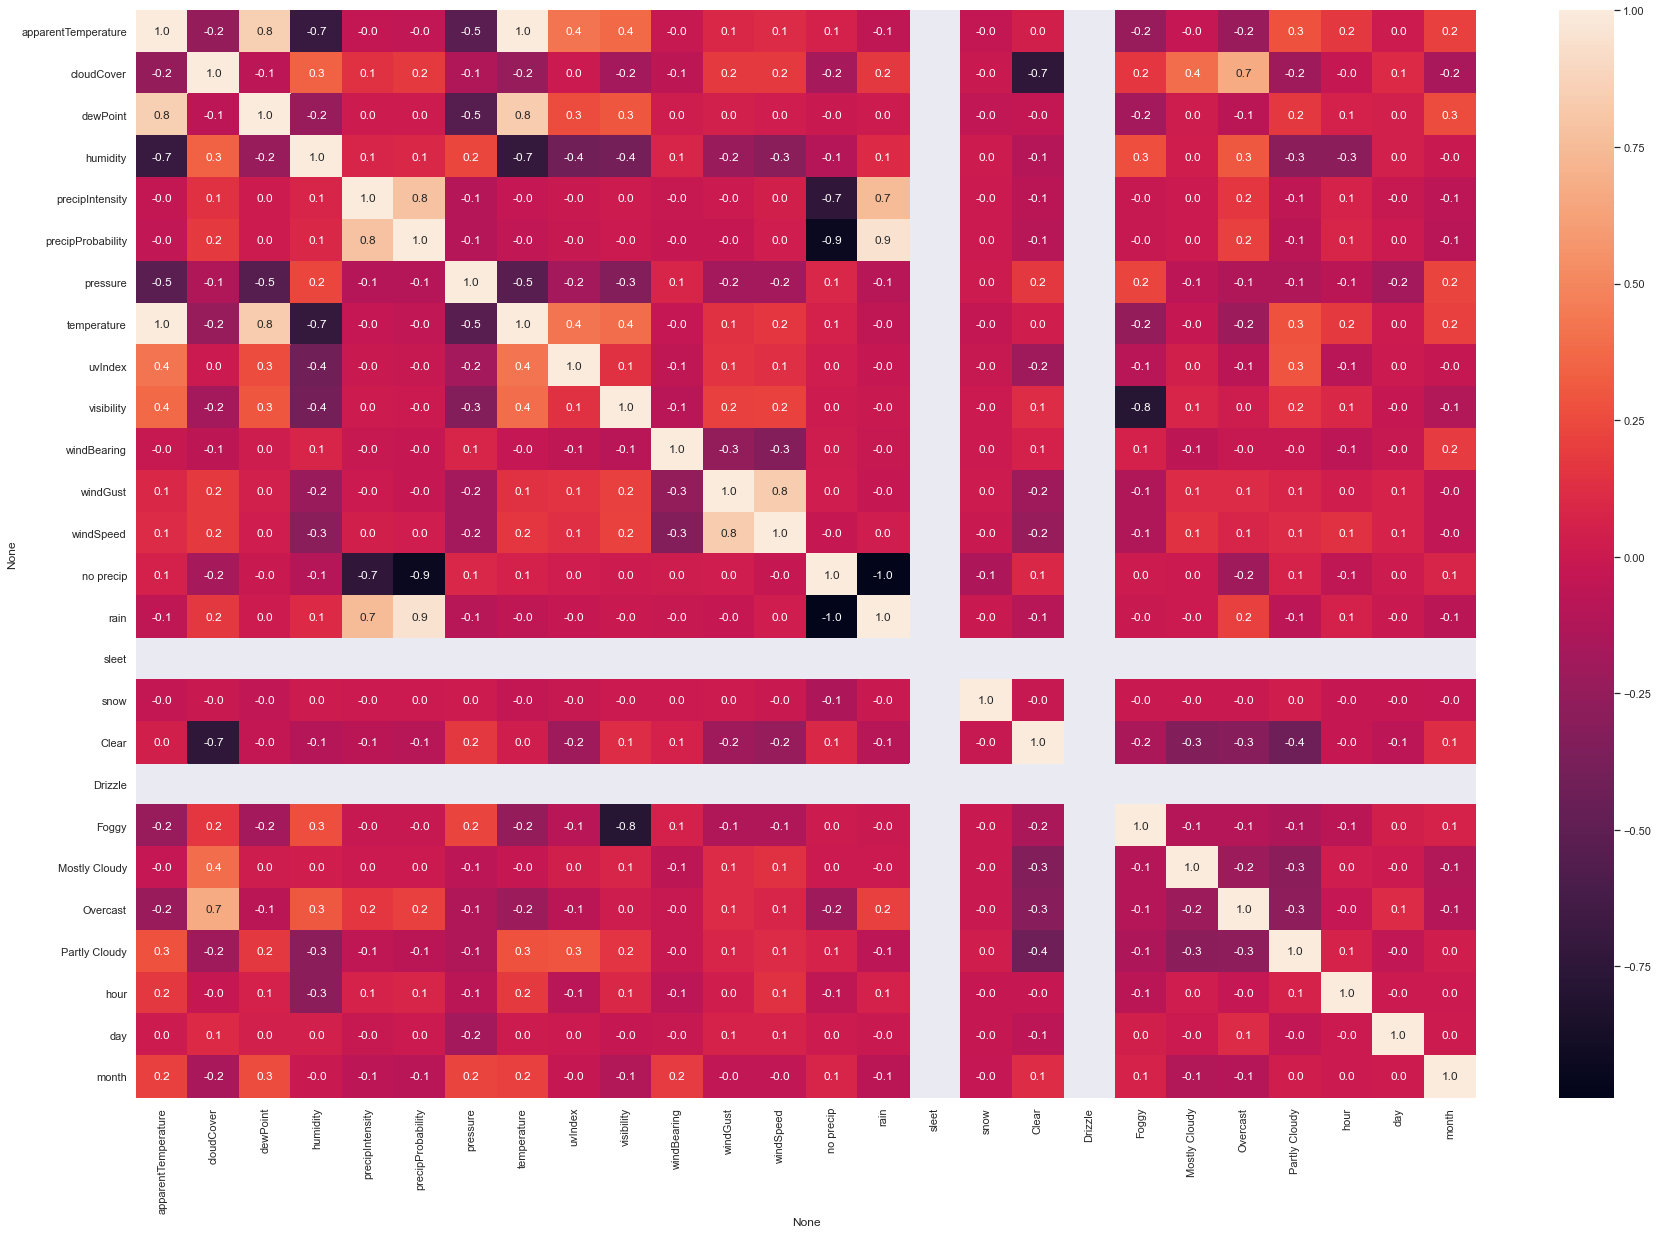

In [7]:
#Correlation Matrix for the X
sns.set(font_scale=1)
correlation_train=X.corr()
plt.figure(figsize=(30, 20))
sns.heatmap(correlation_train, annot=True, fmt='.1f')
plt.show()

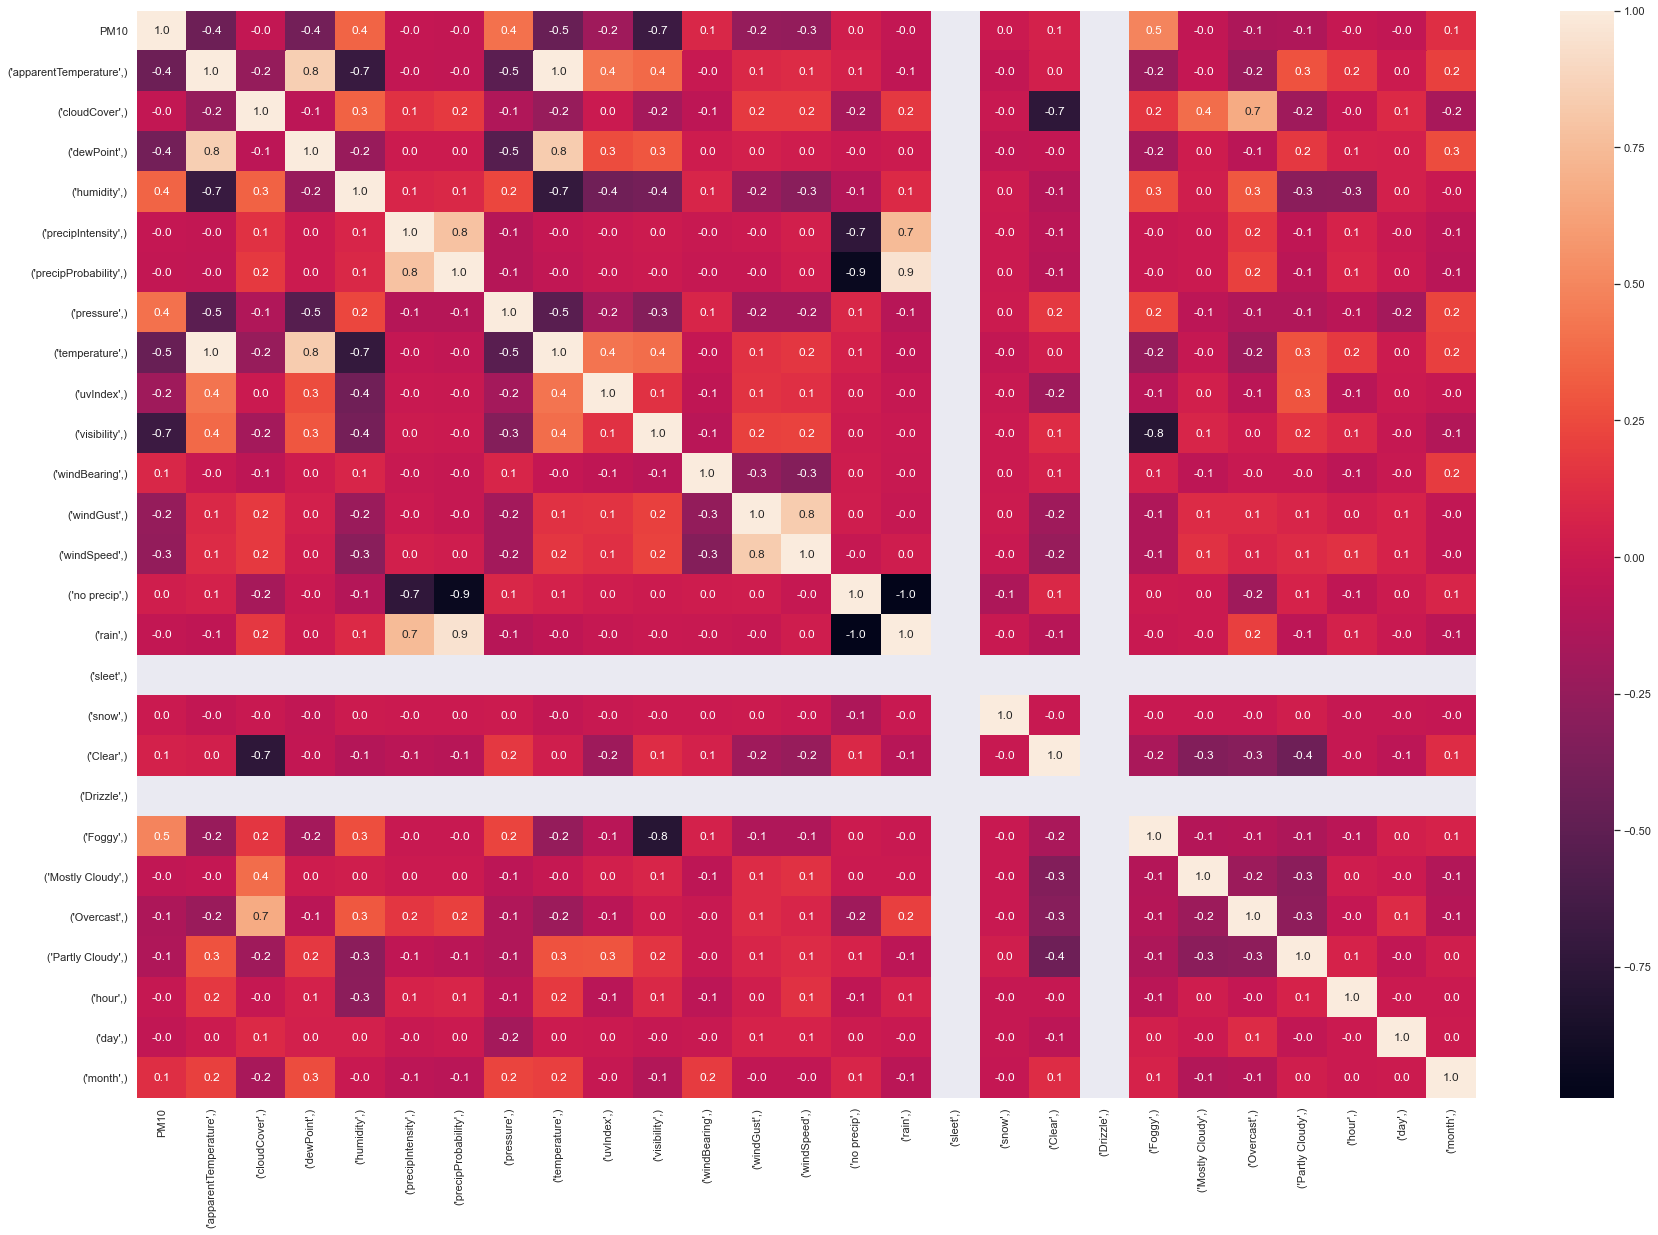

In [8]:
#Correlation Matrix that includes the Target:  
result = pd.concat([y, X], axis=1)
correlation_train=result.corr()
plt.figure(figsize=(30, 20))
sns.heatmap(correlation_train, annot=True, fmt='.1f')
plt.show()

In [9]:
X = X.drop(['sleet', 'Drizzle'], axis=1)
X

,apparentTemperature,cloudCover,dewPoint,humidity,precipIntensity,precipProbability,pressure,temperature,uvIndex,visibility,...,rain,snow,Clear,Foggy,Mostly Cloudy,Overcast,Partly Cloudy,hour,day,month
0,-2.292773,0.051981,-2.889197,-0.384197,-0.107464,-0.136107,1.754999,-1.988818,-0.561126,0.37645,...,-0.143826,-0.020204,-0.690578,-0.22054,-0.477272,-0.450858,1.623578,-1.746173,-1.698534,-1.507321
1,-2.501684,0.051981,-3.028251,-0.432399,-0.107464,-0.136107,1.788433,-2.082007,-0.561126,0.37645,...,-0.143826,-0.020204,-0.690578,-0.22054,-0.477272,-0.450858,1.623578,-1.598118,-1.698534,-1.507321
2,-2.564457,0.051981,-3.028251,-0.191390,-0.107464,-0.136107,1.821866,-2.177813,-0.561126,0.37645,...,-0.143826,-0.020204,-0.690578,-0.22054,-0.477272,-0.450858,1.623578,-1.450063,-1.698534,-1.507321
3,-2.453473,0.051981,-3.028251,-0.432399,-0.107464,-0.136107,1.855299,-2.082007,-0.561126,0.37645,...,-0.143826,-0.020204,-0.690578,-0.22054,-0.477272,-0.450858,1.623578,-1.302008,-1.698534,-1.507321
4,-2.464019,0.051981,-3.077192,-0.287794,-0.107464,-0.136107,1.923360,-2.165772,-0.561126,0.37645,...,-0.143826,-0.020204,-0.690578,-0.22054,-0.477272,-0.450858,1.623578,-1.153953,-1.698534,-1.507321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,-1.760954,-1.082885,-2.433190,-0.480601,-0.107464,-0.136107,1.706043,-1.633864,-0.561126,0.37645,...,-0.143826,-0.020204,1.448062,-0.22054,-0.477272,-0.450858,-0.615924,1.066875,1.714224,1.610089
7348,-2.123033,-1.082885,-2.471256,0.097820,-0.107464,-0.136107,1.728730,-1.895106,-0.561126,0.37645,...,-0.143826,-0.020204,1.448062,-0.22054,-0.477272,-0.450858,-0.615924,1.214931,1.714224,1.610089
7349,-2.075325,-1.082885,-2.594774,-0.384197,-0.107464,-0.136107,1.751417,-1.777312,-0.561126,0.37645,...,-0.143826,-0.020204,1.448062,-0.22054,-0.477272,-0.450858,-0.615924,1.362986,1.714224,1.610089
7350,-1.961328,-1.082885,-2.471256,0.628038,-0.107464,-0.136107,1.735496,-2.082007,-0.561126,0.37645,...,-0.143826,-0.020204,1.448062,-0.22054,-0.477272,-0.450858,-0.615924,1.511041,1.714224,1.610089


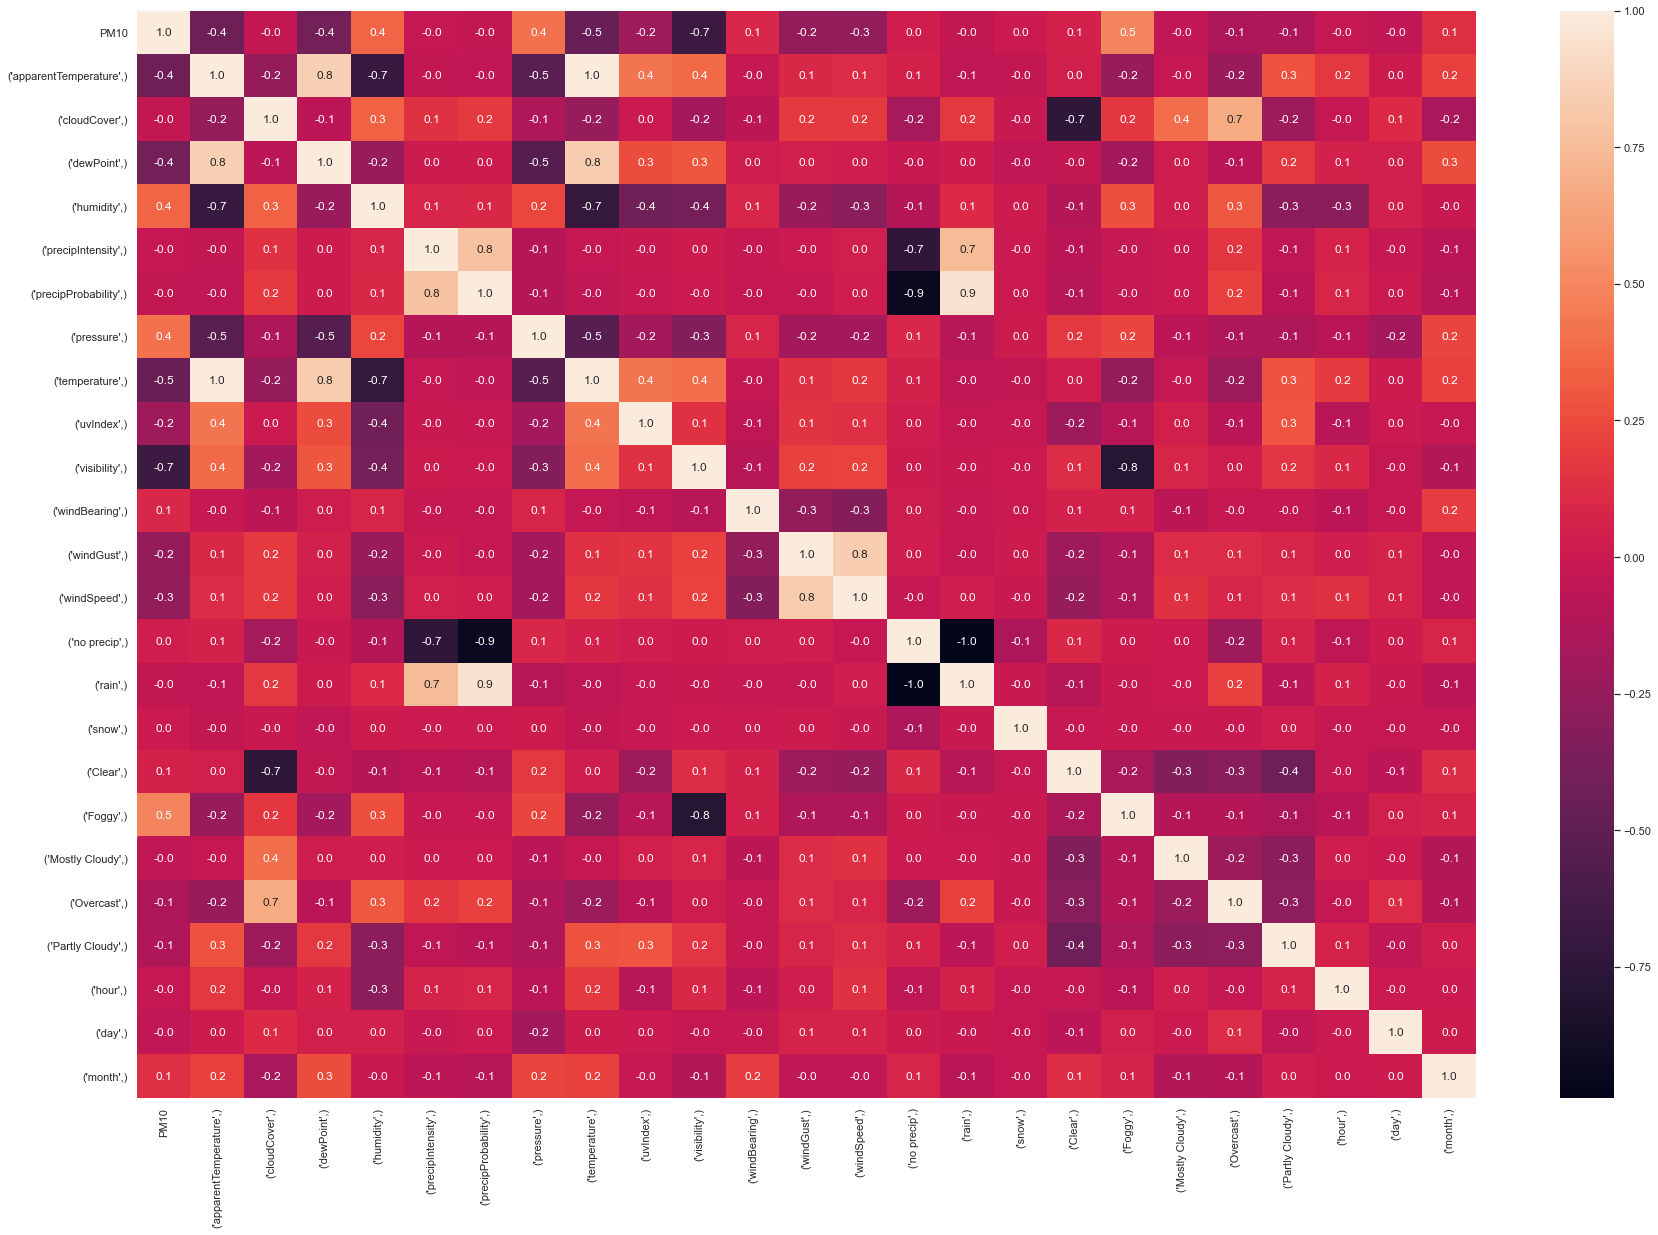

In [10]:
#Correlation Matrix that includes the Target:  (without 'sleet', 'Drizzle' )
result = pd.concat([y, X], axis=1)
correlation_train=result.corr()
plt.figure(figsize=(30, 20))
sns.heatmap(correlation_train, annot=True, fmt='.1f')
plt.savefig('fig_name1.pdf')  
plt.show()


## Split the data 70%-30%

Set the random_state=1

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [12]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5514 entries, 3577 to 6523
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PM10    5514 non-null   float64
dtypes: float64(1)
memory usage: 86.2 KB


# 3  Regression Learning

## 3.1 Create regressors with default parameters:
- Simple Linear Regression (using only the most correlated feature with the target)
- Linear Regression
- Polynomial with degree 2
- Polynomial with degree 3
- Dummy regressor

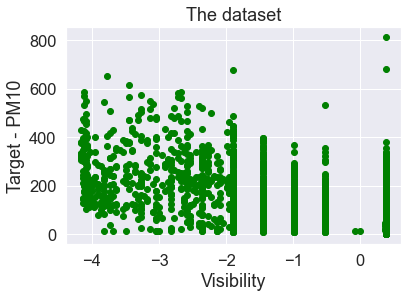

In [13]:
X_sim_lin_reg=X[['visibility']]
y_sim_lin_reg=y['PM10']

# Plot outputs
sns.set(font_scale=1.5)
plt.scatter(X_sim_lin_reg, y_sim_lin_reg,  color='green')

plt.xlabel('Visibility')
plt.ylabel('Target - PM10')
plt.title("The dataset")
plt.show()

In [14]:
X_sim_lin_reg

,visibility
0,0.37645
1,0.37645
2,0.37645
3,0.37645
4,0.37645
...,...
7347,0.37645
7348,0.37645
7349,0.37645
7350,0.37645


In [15]:
# Simple Linear regression

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_sim_lin_reg, y_sim_lin_reg)

# Make predictions using the testing set
simple_lin_y_pred = regr.predict(X_sim_lin_reg)

print ("Simple Linear Regressor performance:")
# The mean absolute error
print('- Mean absolute error: %.2f'
      % mean_absolute_error(y_sim_lin_reg, simple_lin_y_pred))

# The mean squared error
print('- Mean squared error: %.2f'
      % mean_squared_error(y_sim_lin_reg, simple_lin_y_pred))

# The Root mean squared error
print('- Root mean squared error: %.2f'
      % np.sqrt(mean_squared_error(y_sim_lin_reg, simple_lin_y_pred)))

# The coefficient of determination: 1 is perfect prediction
print('- Coefficient of determination (R2 score): %.2f'
      % r2_score(y_sim_lin_reg, simple_lin_y_pred))

Simple Linear Regressor performance:
- Mean absolute error: 38.06
- Mean squared error: 3672.24
- Root mean squared error: 60.60
- Coefficient of determination (R2 score): 0.46


In [16]:
# Multivariate Linear Regression
X_sim_lin_reg= X[['visibility','temperature','dewPoint']]
#X_sim_lin_reg= X[['visibility'],['temperature'],['dewPoint']]
y_sim_lin_reg=y['PM10']

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_sim_lin_reg, y_sim_lin_reg)

# Make predictions using the testing set
multi_lin_y_pred = regr.predict(X_sim_lin_reg)

print ("Multivariate Linear Regression performance:")
# The mean absolute error
print('- Mean absolute error: %.2f'
      % mean_absolute_error(y_sim_lin_reg, multi_lin_y_pred))

# The mean squared error
print('- Mean squared error: %.2f'
      % mean_squared_error(y_sim_lin_reg, multi_lin_y_pred))

# The Root mean squared error
print('- Root mean squared error: %.2f'
      % np.sqrt(mean_squared_error(y_sim_lin_reg, multi_lin_y_pred)))

# The coefficient of determination: 1 is perfect prediction
print('- Coefficient of determination (R2 score): %.2f'
      % r2_score(y_sim_lin_reg, multi_lin_y_pred))

Multivariate Linear Regression performance:
- Mean absolute error: 36.50
- Mean squared error: 3346.30
- Root mean squared error: 57.85
- Coefficient of determination (R2 score): 0.50


In [17]:
# Polynomial with degree 2

poly2 = PolynomialFeatures(degree = 2) 
X_poly2 = poly2.fit_transform(X_sim_lin_reg) 
poly2.fit(X_poly2, y_sim_lin_reg)

lin2 = linear_model.LinearRegression()
lin2.fit(X_poly2, y_sim_lin_reg) 
X_poly_test = poly2.fit_transform(X_sim_lin_reg)
poly_y_pred2 = lin2.predict(X_poly_test)

print (" Polynomial with degree 2:")
# The mean absolute error
print('- Mean absolute error: %.2f'
      % mean_absolute_error(y_sim_lin_reg, poly_y_pred2))

# The mean squared error
print('- Mean squared error: %.2f'
      % mean_squared_error(y_sim_lin_reg, poly_y_pred2))

# The Root mean squared error
print('- Root mean squared error: %.2f'
      % np.sqrt(mean_squared_error(y_sim_lin_reg, poly_y_pred2)))

# The coefficient of determination: 1 is perfect prediction
print('- Coefficient of determination (R2 score): %.2f'
      % r2_score(y_sim_lin_reg, poly_y_pred2))

 Polynomial with degree 2:
- Mean absolute error: 33.26
- Mean squared error: 2787.75
- Root mean squared error: 52.80
- Coefficient of determination (R2 score): 0.59


In [18]:
# Polynomial with degree 3

poly3 = PolynomialFeatures(degree = 3) 
X_poly3 = poly3.fit_transform(X_sim_lin_reg) 
poly2.fit(X_poly3, y_sim_lin_reg)

lin3 = linear_model.LinearRegression()
lin3.fit(X_poly3, y_sim_lin_reg) 
X_poly_test = poly3.fit_transform(X_sim_lin_reg)
poly_y_pred3 = lin3.predict(X_poly_test)

print (" Polynomial with degree 3:")
# The mean absolute error
print('- Mean absolute error: %.2f'
      % mean_absolute_error(y_sim_lin_reg, poly_y_pred3))

# The mean squared error
print('- Mean squared error: %.2f'
      % mean_squared_error(y_sim_lin_reg, poly_y_pred3))

# The Root mean squared error
print('- Root mean squared error: %.2f'
      % np.sqrt(mean_squared_error(y_sim_lin_reg, poly_y_pred3)))

# The coefficient of determination: 1 is perfect prediction
print('- Coefficient of determination (R2 score): %.2f'
      % r2_score(y_sim_lin_reg, poly_y_pred3))


 Polynomial with degree 3:
- Mean absolute error: 32.55
- Mean squared error: 2716.37
- Root mean squared error: 52.12
- Coefficient of determination (R2 score): 0.60


In [19]:
# Dummy Regressor
dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(X_sim_lin_reg, y_sim_lin_reg)
# Make predictions using the testing set
y_pred_dummy = dummy_regr.predict(X_sim_lin_reg)

print (" Dummy regressor:")
# The mean absolute error
print('- Mean absolute error: %.2f'
      % mean_absolute_error(y_sim_lin_reg, y_pred_dummy))

# The mean squared error
print('- Mean squared error: %.2f'
      % mean_squared_error(y_sim_lin_reg, y_pred_dummy))

# The Root mean squared error
print('- Root mean squared error: %.2f'
      % np.sqrt(mean_squared_error(y_sim_lin_reg, y_pred_dummy)))

# The coefficient of determination: 1 is perfect prediction
print('- Coefficient of determination (R2 score): %.2f'
      % r2_score(y_sim_lin_reg, y_pred_dummy))

 Dummy regressor:
- Mean absolute error: 54.96
- Mean squared error: 6758.11
- Root mean squared error: 82.21
- Coefficient of determination (R2 score): 0.00


## 3.2  Compare the MAE, MSE, RMSE and R2 values in a table

In [20]:
# Calculate the metrics

# Simple Linear regression
mae = mean_absolute_error(y_sim_lin_reg, simple_lin_y_pred)
mse = mean_squared_error(y_sim_lin_reg, simple_lin_y_pred)
rmse = np.sqrt(mean_squared_error(y_sim_lin_reg, simple_lin_y_pred))
r2 = r2_score(y_sim_lin_reg, simple_lin_y_pred)

# Multiple regression
mae2 = mean_absolute_error(y_sim_lin_reg, multi_lin_y_pred)
mse2 = mean_squared_error(y_sim_lin_reg, multi_lin_y_pred)
rmse2 = np.sqrt(mean_squared_error(y_sim_lin_reg, multi_lin_y_pred))
r22 = r2_score(y_sim_lin_reg, multi_lin_y_pred)

# Polinomial regression 2
mae3 = mean_absolute_error(y_sim_lin_reg, poly_y_pred2)
mse3 = mean_squared_error(y_sim_lin_reg, poly_y_pred2)
rmse3 = np.sqrt(mean_squared_error(y_sim_lin_reg, poly_y_pred2))
r23 = r2_score(y_sim_lin_reg, poly_y_pred2)

# Polinomial regression 3
mae4 = mean_absolute_error(y_sim_lin_reg, poly_y_pred3)
mse4 = mean_squared_error(y_sim_lin_reg, poly_y_pred3)
rmse4 = np.sqrt(mean_squared_error(y_sim_lin_reg, poly_y_pred3))
r24 = r2_score(y_sim_lin_reg, poly_y_pred3)

# Dummy regression
mae5 = mean_absolute_error(y_sim_lin_reg, y_pred_dummy)
mse5 = mean_squared_error(y_sim_lin_reg, y_pred_dummy)
rmse5 = np.sqrt(mean_squared_error(y_sim_lin_reg, y_pred_dummy))
r25 = r2_score(y_sim_lin_reg, y_pred_dummy)

#construct the comparison table
data = {'Metric':  ['MAE', 'MSE','RMSE','R2'],
        'Linear Regression': [mae,mse,rmse,r2],
        'Multiple regression': [mae2,mse2,rmse2,r22],
        'Polinomial regression 2': [mae3,mse3,rmse3,r23],
        'Polinomial regression 3': [mae4,mse4,rmse4,r24],
        'Dummy': [mae5,mse5,rmse5,r25],
        }

comparison = pd.DataFrame (data, columns = ['Metric','Linear Regression', 'Multiple regression','Polinomial regression 2',
                                            'Polinomial regression 3','Dummy'])

comparison

,Metric,Linear Regression,Multiple regression,Polinomial regression 2,Polinomial regression 3,Dummy
0,MAE,38.060363,36.496870,33.257848,32.554117,54.955503
1,MSE,3672.241103,3346.296049,2787.751327,2716.370591,6758.111082
2,RMSE,60.599019,57.847178,52.799160,52.118812,82.207731
3,R2,0.456617,0.504847,0.587495,0.598058,0.000000


## 3.3 Visualize the Predictions/Errors for each regressor

Visualize the errors (actual vs predicted)

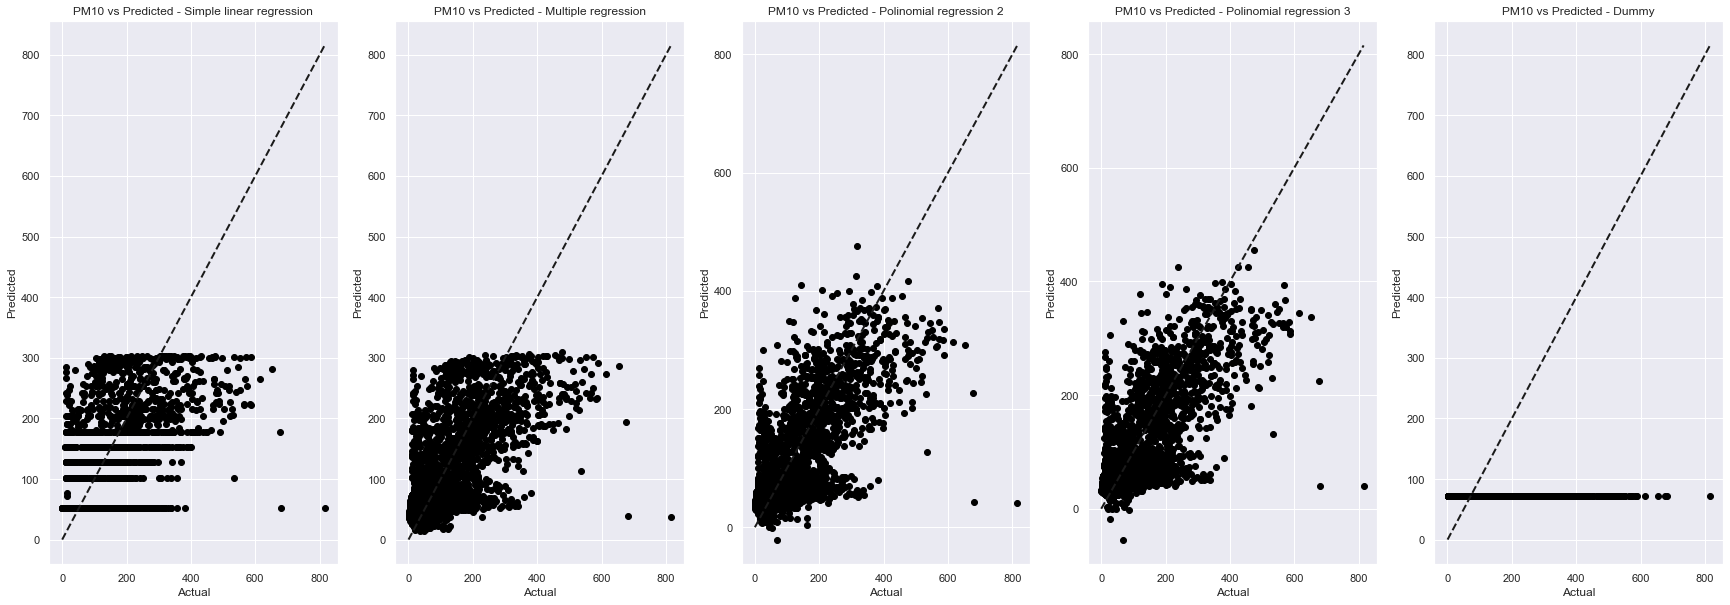

In [21]:
sns.set(font_scale=1)
fig, (ax1, ax2, ax3,ax4,ax5) = plt.subplots(1, 5, figsize=(30,10))

# Simple Linear regression
ax1.scatter(y_sim_lin_reg, simple_lin_y_pred, color='black')
ax1.plot([y_sim_lin_reg.min(), y_sim_lin_reg.max()], [y_sim_lin_reg.min(), y_sim_lin_reg.max()], 'k--', lw=2)
ax1.set_title('PM10 vs Predicted - Simple linear regression')
ax1.set(xlabel='Actual', ylabel='Predicted')

# Multiple regression
ax2.scatter(y_sim_lin_reg, multi_lin_y_pred, color='black')
ax2.plot([y_sim_lin_reg.min(), y_sim_lin_reg.max()], [y_sim_lin_reg.min(), y_sim_lin_reg.max()], 'k--', lw=2)
ax2.set_title('PM10 vs Predicted - Multiple regression')
ax2.set(xlabel='Actual', ylabel='Predicted')

# Polinomial regression 2
ax3.scatter(y_sim_lin_reg, poly_y_pred2, color='black')
ax3.plot([y_sim_lin_reg.min(), y_sim_lin_reg.max()], [y_sim_lin_reg.min(), y_sim_lin_reg.max()], 'k--', lw=2)
ax3.set_title('PM10 vs Predicted - Polinomial regression 2')
ax3.set(xlabel='Actual', ylabel='Predicted')

# Polinomial regression 3
ax4.scatter(y_sim_lin_reg, poly_y_pred3, color='black')
ax4.plot([y_sim_lin_reg.min(), y_sim_lin_reg.max()], [y_sim_lin_reg.min(), y_sim_lin_reg.max()], 'k--', lw=2)
ax4.set_title('PM10 vs Predicted - Polinomial regression 3')
ax4.set(xlabel='Actual', ylabel='Predicted')

# Dummy regression
ax5.scatter(y_sim_lin_reg, y_pred_dummy, color='black')
ax5.plot([y_sim_lin_reg.min(), y_sim_lin_reg.max()], [y_sim_lin_reg.min(), y_sim_lin_reg.max()], 'k--', lw=2)
ax5.set_title('PM10 vs Predicted - Dummy')
ax5.set(xlabel='Actual', ylabel='Predicted')

plt.savefig('fig_name2.pdf')  
plt.show()


# 4. Evaluation Metrics

For all the comparisons use the following algorithms/regressors:
- Linear Regression
- Dummy regressor

## 4.1 Evaluate the models using 80-20 random split
- Compare the MAE, MSE, RMSE and R2 values in a table 

In [22]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

X_sim_lin_reg= X_train[['visibility','temperature','dewPoint']]
y_sim_lin_reg=y_train['PM10']

# Multivariate Linear Regression
    # Create Multivariate Linear Regression object
regr = linear_model.LinearRegression()
    # Train the model using the training sets
regr.fit(X_sim_lin_reg, y_sim_lin_reg)
    # Make predictions using the testing set
multi_lin_y_pred = regr.predict(X_sim_lin_reg)
 # Calculate the metrics
mae2 = mean_absolute_error(y_sim_lin_reg, multi_lin_y_pred)
mse2 = mean_squared_error(y_sim_lin_reg, multi_lin_y_pred)
rmse2 = np.sqrt(mean_squared_error(y_sim_lin_reg, multi_lin_y_pred))
r22 = r2_score(y_sim_lin_reg, multi_lin_y_pred)

# Dummy regressor
dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(X_sim_lin_reg, y_sim_lin_reg)
    # Make predictions using the testing set
y_pred_dummy = dummy_regr.predict(X_sim_lin_reg)
    # Calculate the metrics
mae5 = mean_absolute_error(y_sim_lin_reg, y_pred_dummy)
mse5 = mean_squared_error(y_sim_lin_reg, y_pred_dummy)
rmse5 = np.sqrt(mean_squared_error(y_sim_lin_reg, y_pred_dummy))
r25 = r2_score(y_sim_lin_reg, y_pred_dummy)


#construct the comparison table
data = {'Metric':  ['MAE', 'MSE','RMSE','R2'],
        'Multiple regression': [mae2,mse2,rmse2,r22],
        'Dummy': [mae5,mse5,rmse5,r25],
        }

comparison = pd.DataFrame (data, columns = ['Metric','Multiple regression','Dummy'])

comparison

,Metric,Multiple regression,Dummy
0,MAE,36.733255,55.374544
1,MSE,3427.343812,6885.564615
2,RMSE,58.543521,82.979302
3,R2,0.502242,0.000000


## 4.2 Evaluate the models with manual separation
Use the first 6000 samples as train, the rest for test

- Compare the MAE, MSE, RMSE and R2 values in a table

In [23]:
X.shape
X_train = X[0:6000]
X_test = X[6001:7352]

y_train = y[0:6000]
y_test = y[6001:7352]

X_sim_lin_reg= X_train[['visibility','temperature','dewPoint']]
y_sim_lin_reg=y_train['PM10']

# Multivariate Linear Regression
    # Create Multivariate Linear Regression object
regr = linear_model.LinearRegression()
    # Train the model using the training sets
regr.fit(X_sim_lin_reg, y_sim_lin_reg)
    # Make predictions using the testing set
multi_lin_y_pred = regr.predict(X_sim_lin_reg)
 # Calculate the metrics
mae2 = mean_absolute_error(y_sim_lin_reg, multi_lin_y_pred)
mse2 = mean_squared_error(y_sim_lin_reg, multi_lin_y_pred)
rmse2 = np.sqrt(mean_squared_error(y_sim_lin_reg, multi_lin_y_pred))
r22 = r2_score(y_sim_lin_reg, multi_lin_y_pred)

# Dummy regressor
dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(X_sim_lin_reg, y_sim_lin_reg)
    # Make predictions using the testing set
y_pred_dummy = dummy_regr.predict(X_sim_lin_reg)
    # Calculate the metrics
mae5 = mean_absolute_error(y_sim_lin_reg, y_pred_dummy)
mse5 = mean_squared_error(y_sim_lin_reg, y_pred_dummy)
rmse5 = np.sqrt(mean_squared_error(y_sim_lin_reg, y_pred_dummy))
r25 = r2_score(y_sim_lin_reg, y_pred_dummy)


#construct the comparison table
data = {'Metric':  ['MAE', 'MSE','RMSE','R2'],
        'Multiple regression': [mae2,mse2,rmse2,r22],
        'Dummy': [mae5,mse5,rmse5,r25],
        }

comparison = pd.DataFrame (data, columns = ['Metric','Multiple regression','Dummy'])

comparison

,Metric,Multiple regression,Dummy
0,MAE,27.573761,36.049978
1,MSE,2256.625636,4252.775779
2,RMSE,47.503954,65.213310
3,R2,0.469376,0.000000


## 4.3 Evaluate the models using 80-20 random split - STRATIFIED
Compare the MAE, MSE, RMSE and R2 values in a table

(array([ 64.,  72.,  98., 123.,  97., 104.,  95.,  98.,  70.,  66., 518.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.]),
 array([ 5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 30, 32, 34, 36, 38,
        40, 42, 44, 46, 48, 50, 52, 55]),
 <BarContainer object of 24 artists>)

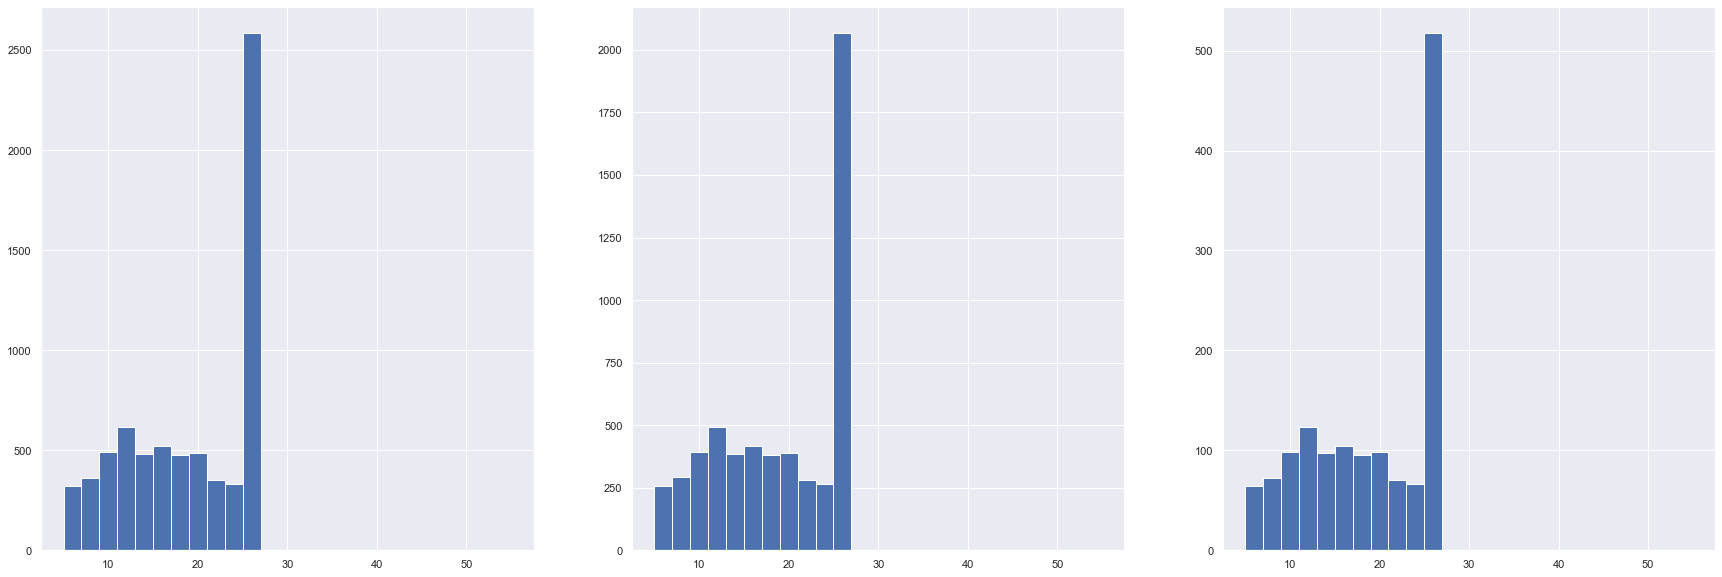

In [24]:
bins = np.linspace(5, 55, 25)
bins = bins.astype(int)
# Save your Y values in a new ndarray,
# broken down by the bins created above.
y_binned = np.digitize(y, bins)

# Pass y_binned to the stratify argument,
# and sklearn will handle the rest
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y_binned)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(30,10))

ax1.hist(y_binned,bins)

y_train_binned = np.digitize(y_train, bins)
ax2.hist(y_train_binned,bins)

y_test_binned = np.digitize(y_test, bins)
ax3.hist(y_test_binned,bins)


In [25]:
X_sim_lin_reg= X_train[['visibility','temperature','dewPoint']]
y_sim_lin_reg=y_train['PM10']

# Multivariate Linear Regression
    # Create Multivariate Linear Regression object
regr = linear_model.LinearRegression()
    # Train the model using the training sets
regr.fit(X_sim_lin_reg, y_sim_lin_reg)
    # Make predictions using the testing set
multi_lin_y_pred = regr.predict(X_sim_lin_reg)
 # Calculate the metrics
mae2 = mean_absolute_error(y_sim_lin_reg, multi_lin_y_pred)
mse2 = mean_squared_error(y_sim_lin_reg, multi_lin_y_pred)
rmse2 = np.sqrt(mean_squared_error(y_sim_lin_reg, multi_lin_y_pred))
r22 = r2_score(y_sim_lin_reg, multi_lin_y_pred)

# Dummy regressor
dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(X_sim_lin_reg, y_sim_lin_reg)
    # Make predictions using the testing set
y_pred_dummy = dummy_regr.predict(X_sim_lin_reg)
    # Calculate the metrics
mae5 = mean_absolute_error(y_sim_lin_reg, y_pred_dummy)
mse5 = mean_squared_error(y_sim_lin_reg, y_pred_dummy)
rmse5 = np.sqrt(mean_squared_error(y_sim_lin_reg, y_pred_dummy))
r25 = r2_score(y_sim_lin_reg, y_pred_dummy)


#construct the comparison table
data = {'Metric':  ['MAE', 'MSE','RMSE','R2'],
        'Multiple regression': [mae2,mse2,rmse2,r22],
        'Dummy': [mae5,mse5,rmse5,r25],
        }

comparison = pd.DataFrame (data, columns = ['Metric','Multiple regression','Dummy'])

comparison

,Metric,Multiple regression,Dummy
0,MAE,36.222666,55.037377
1,MSE,3360.251727,6866.566611
2,RMSE,57.967678,82.864749
3,R2,0.510636,0.000000


## 4.4 Evaluate the models using 10 fold cross validation
Compare the MAE, MSE, RMSE and R2 values in a table

In [26]:
#10-fold Cross validaiton - Linear Model - MAE scores
lin = linear_model.LinearRegression()
kf = KFold(n_splits=10, shuffle=True)
scores = cross_val_score(lin, X, y, cv=kf, scoring='neg_mean_absolute_error')
scores*(-1)
np.mean(scores)*(-1)

34.09344674238823

In [27]:
#10-fold Cross validaiton - Linear Model - MAE scores
np.random.seed(seed=1)
lin = linear_model.LinearRegression()
kf = KFold(n_splits=10, shuffle=True)
scores = cross_val_score(lin, X, y, cv=kf, scoring='neg_mean_absolute_error')
scores*(-1)

array([32.50523301, 33.82431536, 34.5917915 , 32.44183319, 33.45046182,
       35.52410406, 32.64224413, 37.56209577, 35.93999089, 32.78965554])

In [28]:
#10-fold Cross validaiton - Linear Model - All scores

scoring = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error', 'r2']
lin = linear_model.LinearRegression()
scores = cross_validate(lin, X, y, cv=kf, scoring=scoring)

In [29]:
#10-fold Cross validaiton - ALL Model - All scores
np.random.seed(seed=1)
scoring = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error', 'r2']
lin = linear_model.LinearRegression()
scores1 = cross_validate(lin, X, y, cv=kf, scoring=scoring)
y_pred = cross_val_predict(lin, X, y, cv=kf)

#create Dummy regressor
dummy_regr = DummyRegressor(strategy="mean")
scores3 = cross_validate(dummy_regr, X, y, cv=kf, scoring=scoring)
y_dummy = cross_val_predict(dummy_regr, X, y, cv=kf)

In [30]:
#calculate the metrics
#Linear
mae = np.mean(scores1['test_neg_mean_absolute_error']*(-1))
mse = np.mean(scores1['test_neg_mean_squared_error']*(-1))
rmse = np.mean(scores1['test_neg_root_mean_squared_error']*(-1))
r2 = np.mean(scores1['test_r2'])

#Dummy
mae3 = np.mean(scores3['test_neg_mean_absolute_error']*(-1))
mse3 = np.mean(scores3['test_neg_mean_squared_error']*(-1))
rmse3 = np.mean(scores3['test_neg_root_mean_squared_error']*(-1))
r23 = np.mean(scores3['test_r2'])

In [31]:
#construct the comparison table
data = {'Metric':  ['MAE', 'MSE','RMSE','R2'],
        'Linear Regression': [mae,mse,rmse,r2],
        'Dummy': [mae3,mse3,rmse3,r23],
        }

comparison = pd.DataFrame (data, columns = ['Metric','Linear Regression', 'Dummy'])
comparison

,Metric,Linear Regression,Dummy
0,MAE,34.127173,54.965939
1,MSE,2891.165628,6759.928129
2,RMSE,53.587850,82.138979
3,R2,0.570756,-0.001459
